## 1. Fuentes de datos y librerías

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import mplfinance as mpf
import pandas as pd
import seaborn as sns

df_steps = pd.read_csv('/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/data/steps_tracker_dataset.csv')
df_sp500 = pd.read_csv('/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/data/sp500_index.csv')
df_salaries = pd.read_csv('/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/data/it_salaries.csv')

## 2. Diagrama de Venn

In [134]:
df_steps.head()

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad
2,28/01/2022,6622,4.97,198.66,66,6.0,4.48,sad
3,23/03/2022,11136,8.35,334.08,111,8.0,1.08,tired
4,20/05/2022,2718,2.04,81.54,27,4.9,1.00,tired


In [135]:
df_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 500 non-null    object 
 1   steps                500 non-null    int64  
 2   distance_km          500 non-null    float64
 3   calories_burned      500 non-null    float64
 4   active_minutes       500 non-null    int64  
 5   sleep_hours          500 non-null    float64
 6   water_intake_liters  500 non-null    float64
 7   mood                 500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [136]:
df_steps.mood.value_counts()

mood
happy        110
stressed     106
sad           97
energetic     97
tired         90
Name: count, dtype: int64

In [137]:
df_steps.describe()

,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,10238.572000,7.678800,307.157160,102.40800,7.292400,2.506580
std,5829.268207,4.371964,174.878046,58.29293,1.814046,1.426296
min,26.000000,0.020000,0.780000,0.00000,3.100000,0.040000
25%,5313.250000,3.985000,159.397500,53.00000,6.000000,1.300000
50%,10699.000000,8.025000,320.970000,107.00000,7.000000,2.495000
75%,15317.500000,11.490000,459.525000,153.00000,8.225000,3.785000
max,19979.000000,14.980000,599.370000,200.00000,12.000000,5.000000


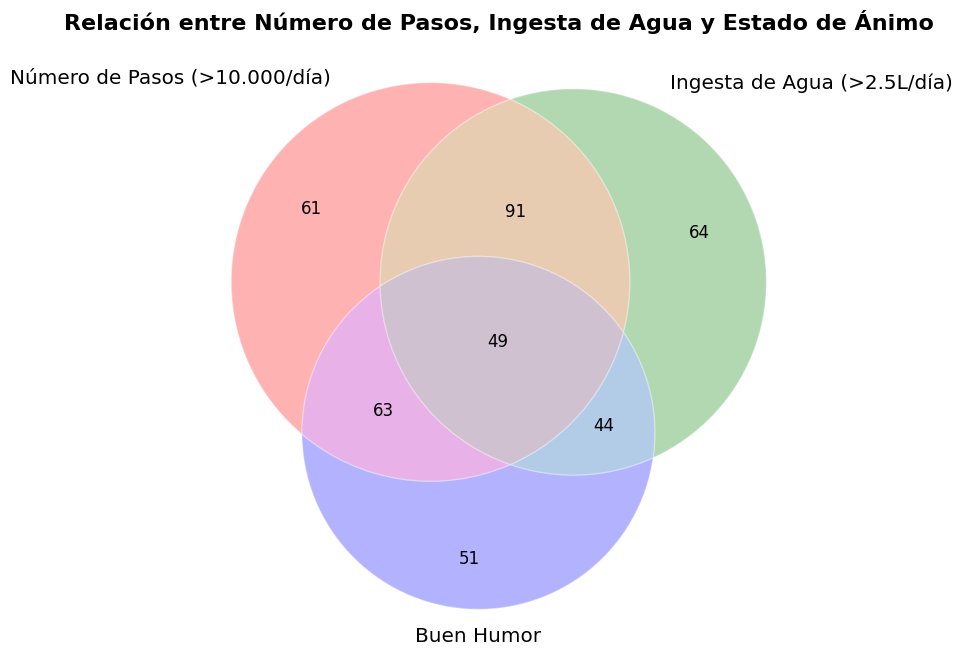

In [ ]:
# Se definen los conjuntos necesarios para realizara el diagrama de Venn
reco_steps = set(df_steps[df_steps["steps"] > 10000].index)
reco_water = set(df_steps[df_steps["water_intake_liters"] > 2.5].index)
good_mood = set(df_steps[df_steps["mood"].isin(["happy", "energetic"])].index)

# Se crea el diagrama de Venn
plt.figure(figsize=(12,8))
venn = venn3([reco_steps, reco_water, good_mood], ("Número de Pasos (>10.000/día)", "Ingesta de Agua (>2.5L/día)", "Buen Humor"))
for i, subset in enumerate(['100', '010', '001', '110', '101', '011', '111']):
    if venn.get_patch_by_id(subset):
        venn.get_patch_by_id(subset).set_edgecolor("white")
        venn.get_patch_by_id(subset).set_alpha(0.3)
        
plt.title("Relación entre Número de Pasos, Ingesta de Agua y Estado de Ánimo", fontsize=16, fontweight='bold')
plt.show()

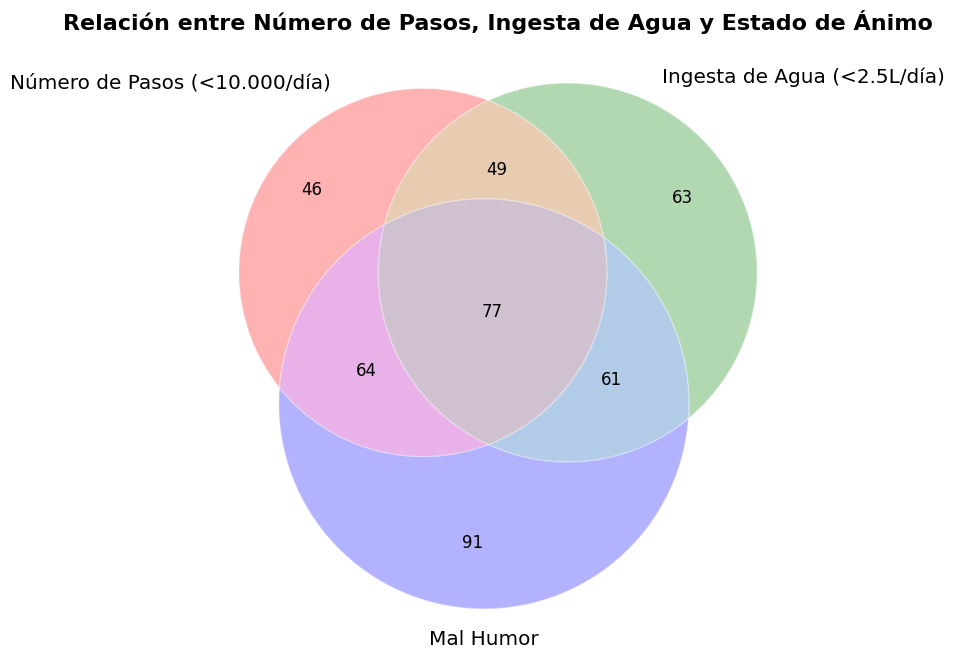

In [ ]:
# Se definen los conjuntos necesarios para realizara el diagrama de Venn
reco_steps = set(df_steps[df_steps["steps"] < 10000].index)
reco_water = set(df_steps[df_steps["water_intake_liters"] < 2.5].index)
bad_mood = set(df_steps[df_steps["mood"].isin(["sad", "tired", "stressed"])].index)

# Se crea el diagrama de Venn
plt.figure(figsize=(12,8))
venn = venn3([reco_steps, reco_water, bad_mood], ("Número de Pasos (<10.000/día)", "Ingesta de Agua (<2.5L/día)", "Mal Humor"))
for i, subset in enumerate(['100', '010', '001', '110', '101', '011', '111']):
    if venn.get_patch_by_id(subset):
        venn.get_patch_by_id(subset).set_edgecolor("white")
        venn.get_patch_by_id(subset).set_alpha(0.3)

plt.title("Relación entre Número de Pasos, Ingesta de Agua y Estado de Ánimo", fontsize=16, fontweight='bold')
plt.show()

## 3. Candlestick

In [140]:
df_sp500.head()

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [141]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [142]:
df_sp500.describe()

,S&P500
count,2517.000000
mean,3346.351605
std,1078.204274
min,1829.080000
25%,2428.370000
50%,2999.910000
75%,4199.120000
max,6090.270000


In [143]:
# Se convierte 'Date' a formato fecha y se filtran los últimos 72 meses
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
last_72_months = df_sp500[df_sp500['Date'] >= df_sp500['Date'].max() - pd.DateOffset(months=72)]
current_year = df_sp500[df_sp500['Date'] >= df_sp500['Date'].max() - pd.DateOffset(months=11)]

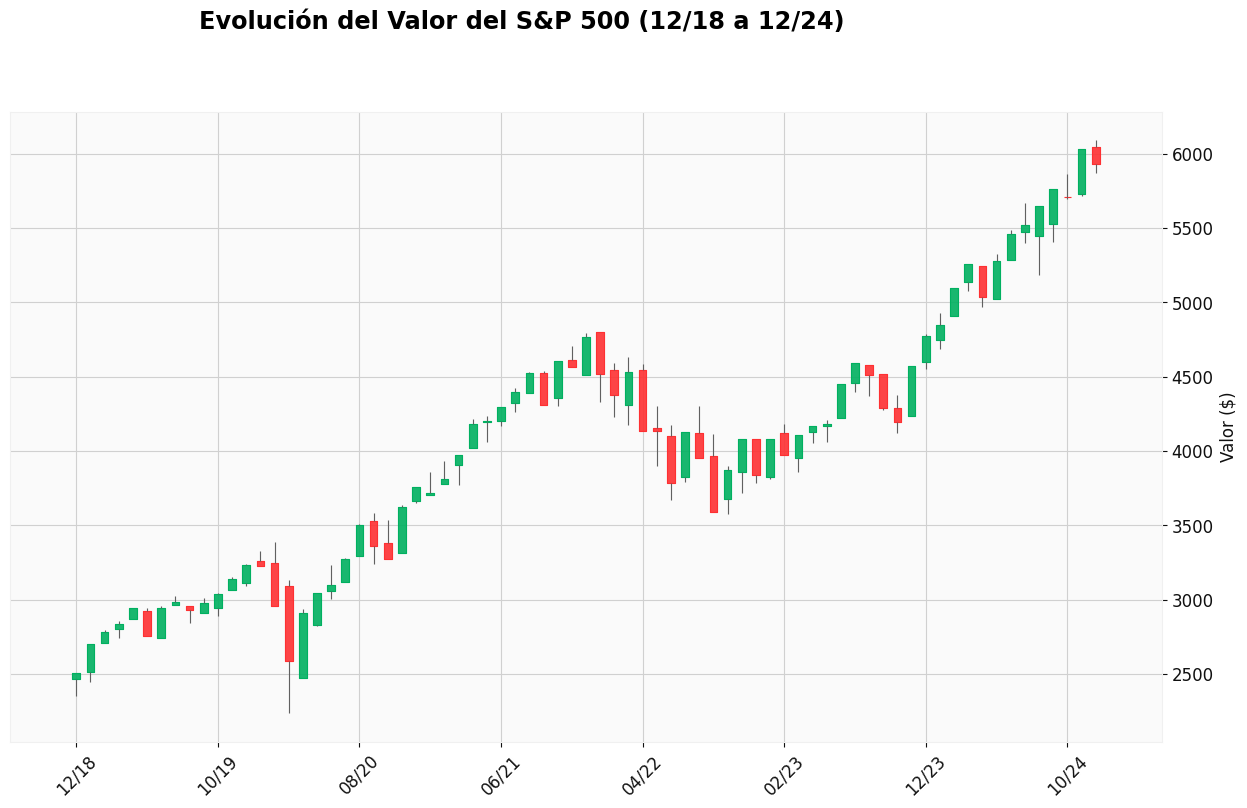

In [ ]:
# Se agrupan los valores del SP500 por mes y se calculan las variables para realizar el gráfico Candlestick
grouped_sp500 = last_72_months.resample('ME', on='Date')['S&P500'].agg(
    Open='first',
    High='max',
    Low='min',
    Close='last'
).sort_index()

mpf.plot(grouped_sp500,
         type='candle',
         style= mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 12}),
         title='Evolución del Valor del S&P 500 (12/18 a 12/24)',
         ylabel='Valor ($)',
         figsize=(16, 9),
         datetime_format='%m/%y')

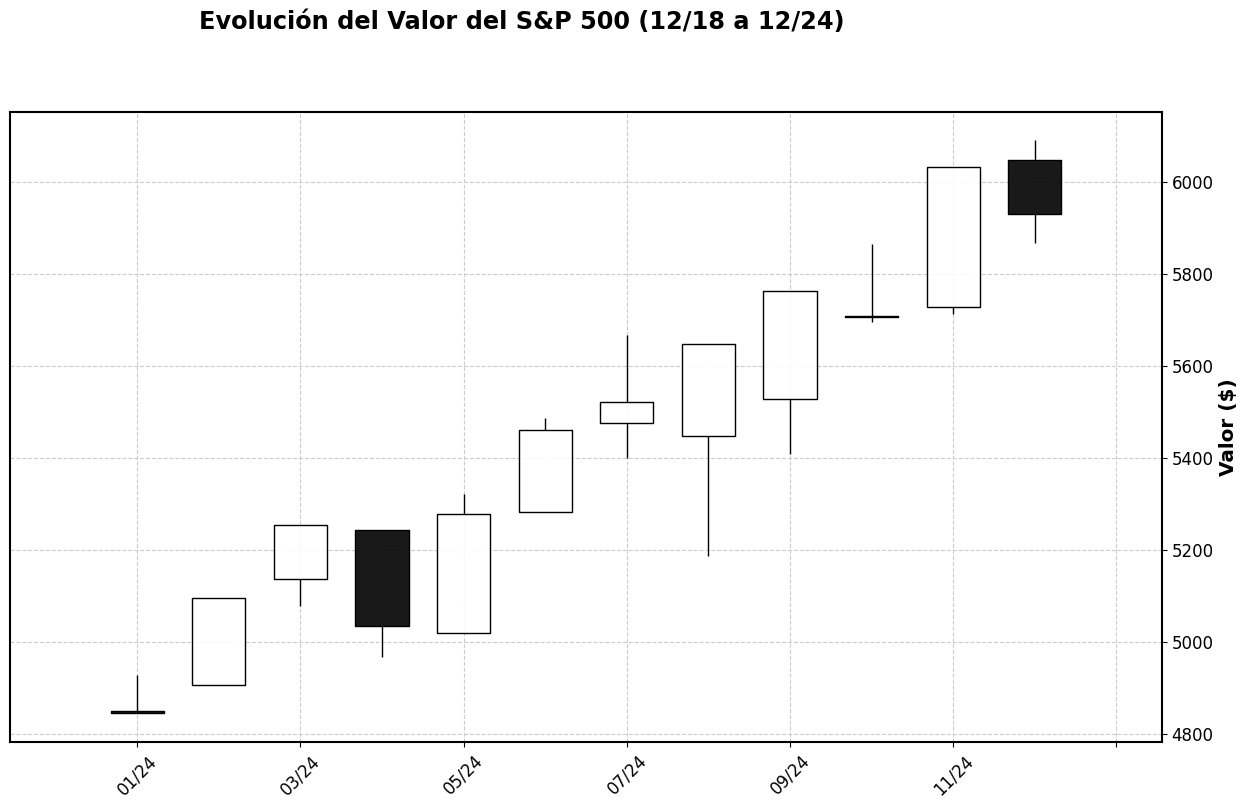

In [ ]:
# Se agrupan los valores del SP500 por mes y se calculan las variables para realizar el gráfico Candlestick
grouped_sp500 = current_year.resample('ME', on='Date')['S&P500'].agg(
    Open='first',
    High='max',
    Low='min',
    Close='last'
).sort_index()

mpf.plot(grouped_sp500,
         type='candle',
         style= mpf.make_mpf_style(base_mpf_style='classic', rc={'font.size': 12}),
         title='Evolución del Valor del S&P 500 (12/18 a 12/24)',
         ylabel='Valor ($)',
         figsize=(16, 9),
         datetime_format='%m/%y')

## 4. Beeswarm Plot

In [146]:
df_salaries.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


In [147]:
df_salaries.describe()

,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [148]:
# Se convierten los salarios de rupias a euros
INR_TO_EUR = 0.011
df_salaries['Salary'] = pd.to_numeric(df_salaries['Salary'], errors='coerce') * INR_TO_EUR

# Se filtra únicamente el trabajo de "Software Development Engineer"
df_sde = df_salaries[df_salaries['Job Title'] == 'Software Development Engineer']

# Se calcula la frecuencia de ciudades, se seleccionan las 8 más frecuentes y se ordenan de mayor a menor
city_counts = df_sde['Location'].value_counts()
top_cities = city_counts.index[:8]
df_filtered = df_sde[df_sde['Location'].isin(top_cities)]
df_filtered['Location'] = pd.Categorical(df_filtered['Location'], categories=top_cities, ordered=True)

/var/folders/mz/k8rbvpq960j5j_tsw4bkmnd80000gn/T/ipykernel_21350/77603988.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Location'] = pd.Categorical(df_filtered['Location'], categories=top_cities, ordered=True)


In [149]:
for i in top_cities:
    print(f'{i}: {city_counts[i]}')

Bangalore: 821
New Delhi: 507
Hyderabad: 284
Pune: 233
Chennai: 172
Mumbai: 172
Kerala: 50
Kolkata: 50


/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/juliannunez/Desktop/Aquiles/UOC/Cuarto semestre/Visualización de datos/PEC 2/venv/lib/python3.11

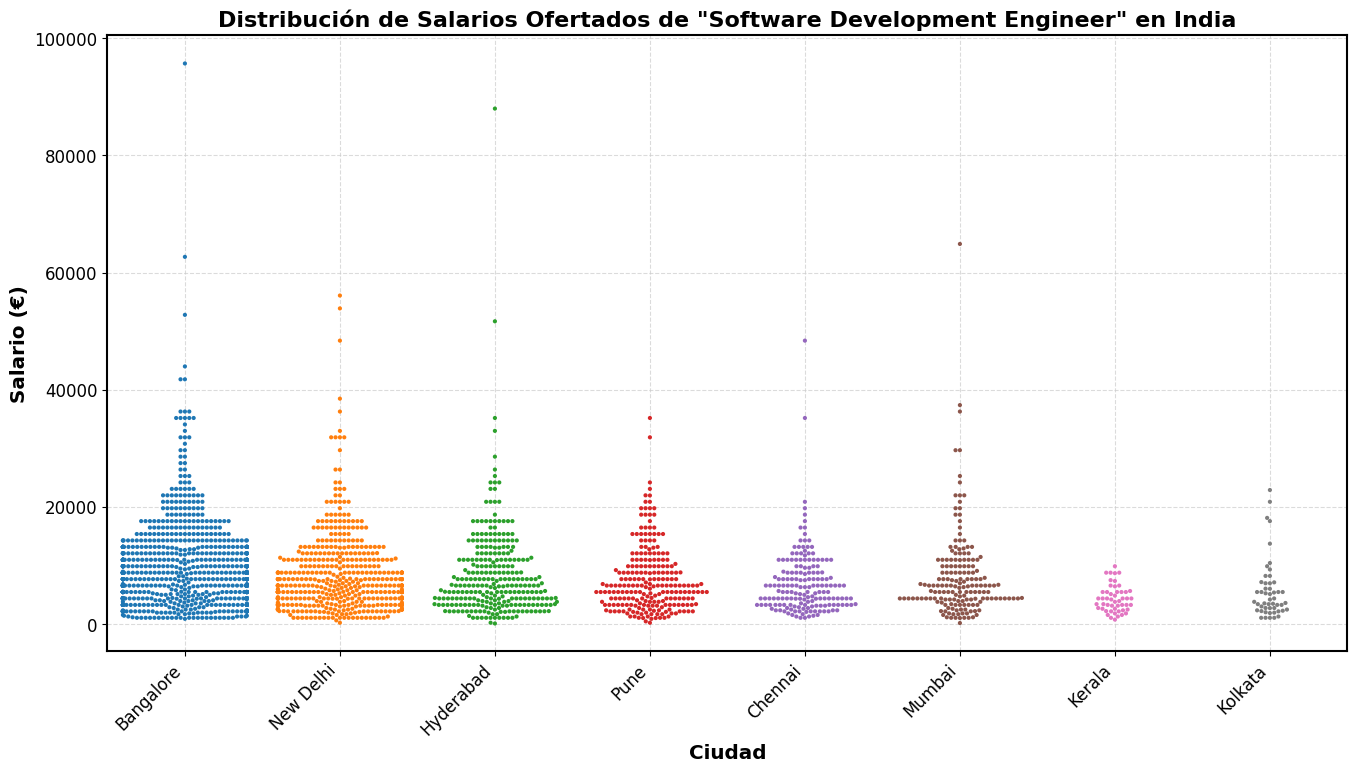

In [150]:
# Se realiza el gráfico Beeswarm

plt.figure(figsize=(16, 8))
sns.swarmplot(
    data=df_filtered, x='Location', y='Salary', hue='Location', 
    dodge=False, palette='tab10', size=3
)

plt.title('Distribución de Salarios Ofertados de "Software Development Engineer" en India', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad')
plt.ylabel('Salario anual(€)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()